In [14]:
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
pop_df = pd.read_csv("remove_min_cost.csv")
pop_df
pop_df["heap"]

0         48
1         96
2        154
3        201
4        248
       ...  
995    40863
996    40882
997    40901
998    40920
999    40939
Name: heap, Length: 1000, dtype: int64

In [16]:
push_df = pd.read_csv("push.csv")
push_df

,beap,heap
0,191,29
1,229,57
2,267,77
3,315,105
4,373,134
...,...,...
995,57606,23207
996,57625,23236
997,57711,23255
998,57730,23293


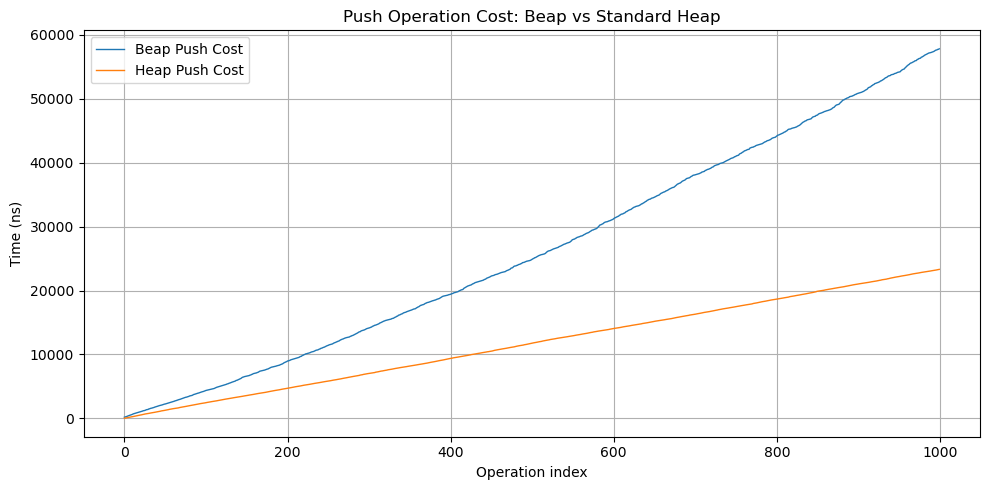

In [17]:
# PUSH COSTS
plt.figure(figsize=(10, 5))
plt.plot(push_df["beap"], label="Beap Push Cost", linewidth=1)
plt.plot(push_df["heap"], label="Heap Push Cost", linewidth=1)
plt.xlabel("Operation index")
plt.ylabel("Time (ns)")
plt.title("Push Operation Cost: Beap vs Standard Heap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()



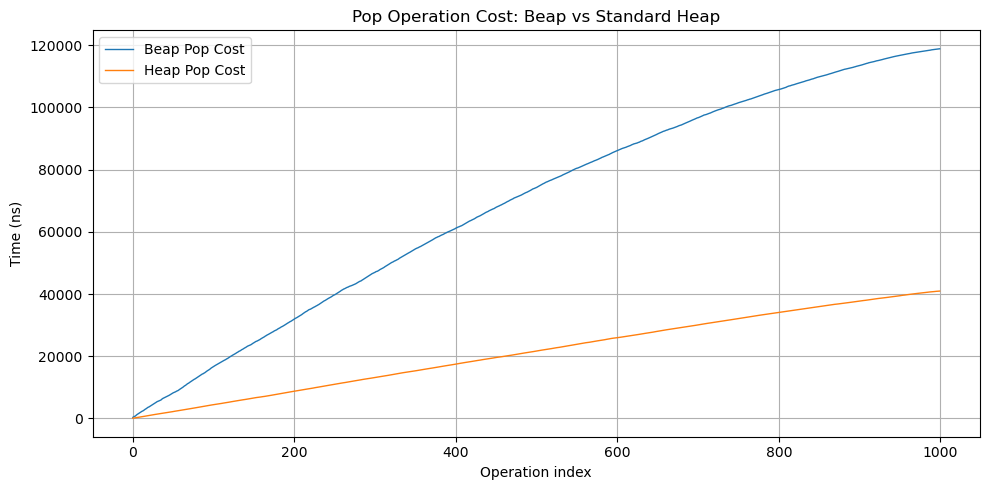

In [19]:
# POP COSTS
plt.figure(figsize=(10, 5))
plt.plot(pop_df["beap"], label="Beap Pop Cost", linewidth=1)
plt.plot(pop_df["heap"], label="Heap Pop Cost", linewidth=1)
plt.xlabel("Operation index")
plt.ylabel("Time (ns)")
plt.title("Pop Operation Cost: Beap vs Standard Heap")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

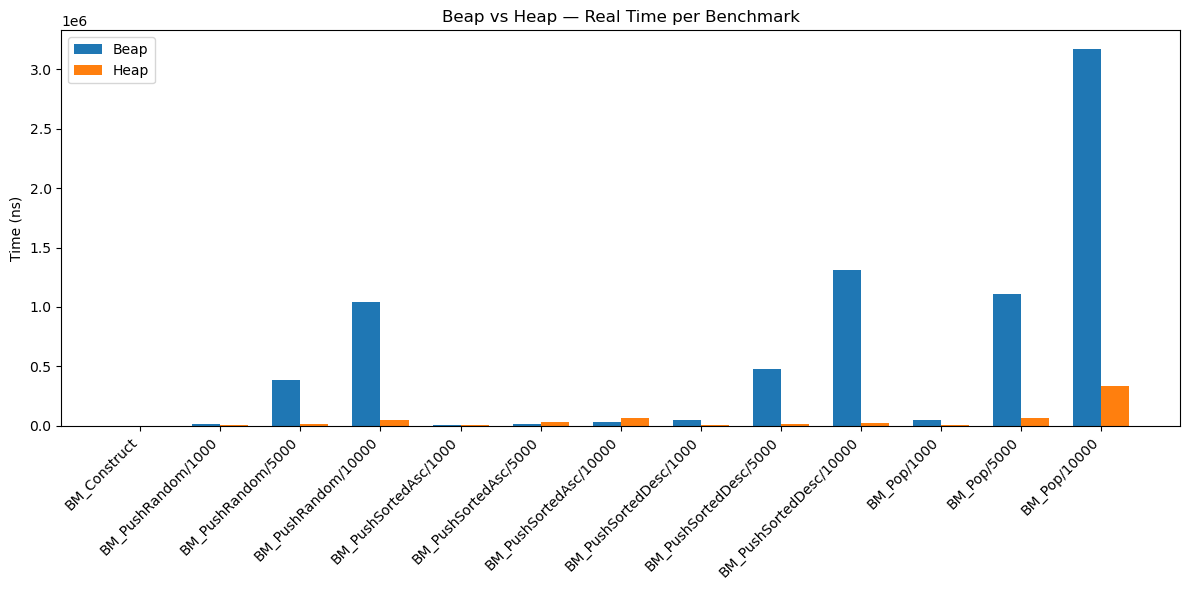

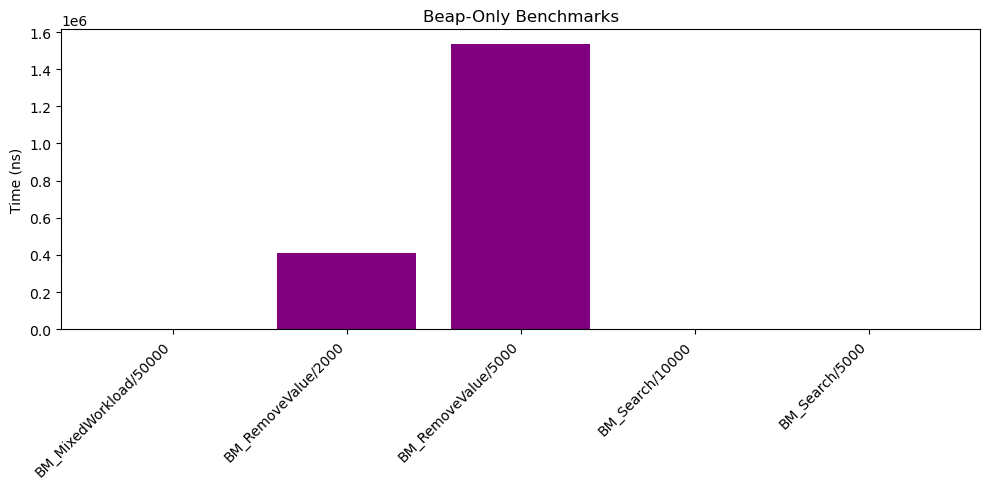

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ------------------------------------------------------------
# Load CSV files
# ------------------------------------------------------------
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")

# We will compare using real_time (ns)
heap_times = heap_df.set_index("name")["real_time"]
beap_times = beap_df.set_index("name")["real_time"]

# ------------------------------------------------------------
# 1. Plot only benchmarks present in BOTH heap and beap
# ------------------------------------------------------------
common_names = heap_times.index.intersection(beap_times.index)

heap_common = heap_times[common_names]
beap_common = beap_times[common_names]

x = np.arange(len(common_names))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x - width/2, beap_common, width, label="Beap")
plt.bar(x + width/2, heap_common, width, label="Heap")

plt.xticks(x, common_names, rotation=45, ha="right")
plt.ylabel("Time (ns)")
plt.title("Beap vs Heap — Real Time per Benchmark")
plt.legend()
plt.tight_layout()
plt.show()

# ------------------------------------------------------------
# 2. Plot benchmarks that ONLY exist in Beap results
# ------------------------------------------------------------
beap_only_names = beap_times.index.difference(heap_times.index)
beap_only = beap_times[beap_only_names]

plt.figure(figsize=(10, 5))
plt.bar(beap_only.index, beap_only.values, color="purple")

plt.xticks(rotation=45, ha="right")
plt.ylabel("Time (ns)")
plt.title("Beap-Only Benchmarks")
plt.tight_layout()
plt.show()


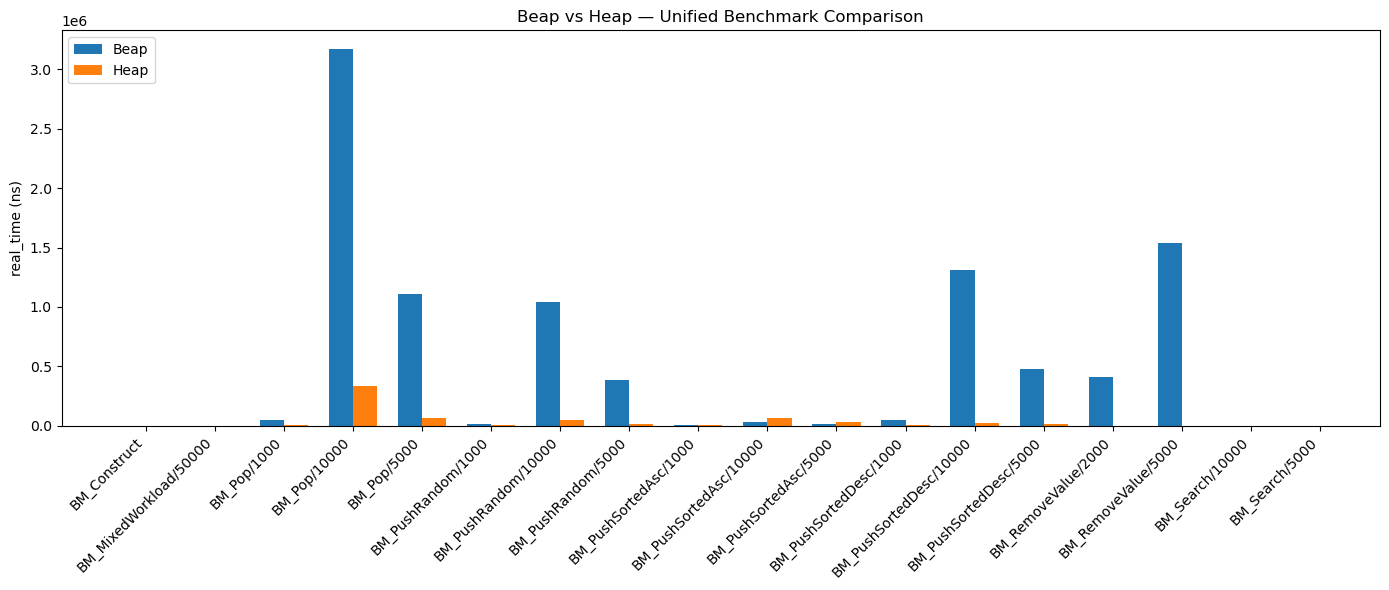

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -----------------------------
# Load CSV files
# -----------------------------
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")

# Set index to names
heap_times = heap_df.set_index("name")["real_time"]
beap_times = beap_df.set_index("name")["real_time"]

# -----------------------------
# Build a combined DataFrame
# -----------------------------
combined = pd.DataFrame({
    "Beap": beap_times,
    "Heap": heap_times
})

# Keep all rows (union of names)
combined = combined.sort_index()

# -----------------------------
# Plot as ONE BAR CHART
# -----------------------------
plt.figure(figsize=(14, 6))

x = np.arange(len(combined.index))
width = 0.35

plt.bar(x - width/2, combined["Beap"], width, label="Beap")
plt.bar(x + width/2, combined["Heap"], width, label="Heap")

plt.xticks(x, combined.index, rotation=45, ha="right")
plt.ylabel("real_time (ns)")
plt.title("Beap vs Heap — Unified Benchmark Comparison")
plt.legend()
plt.tight_layout()
plt.show()


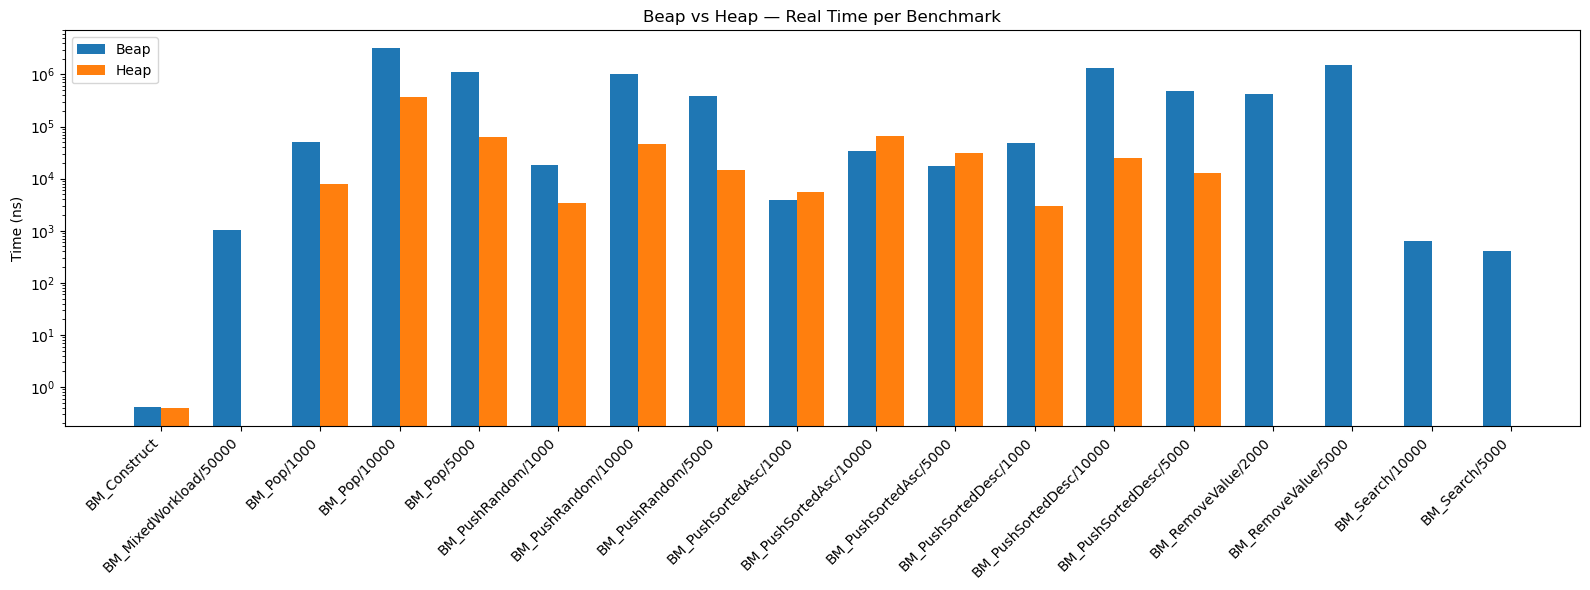

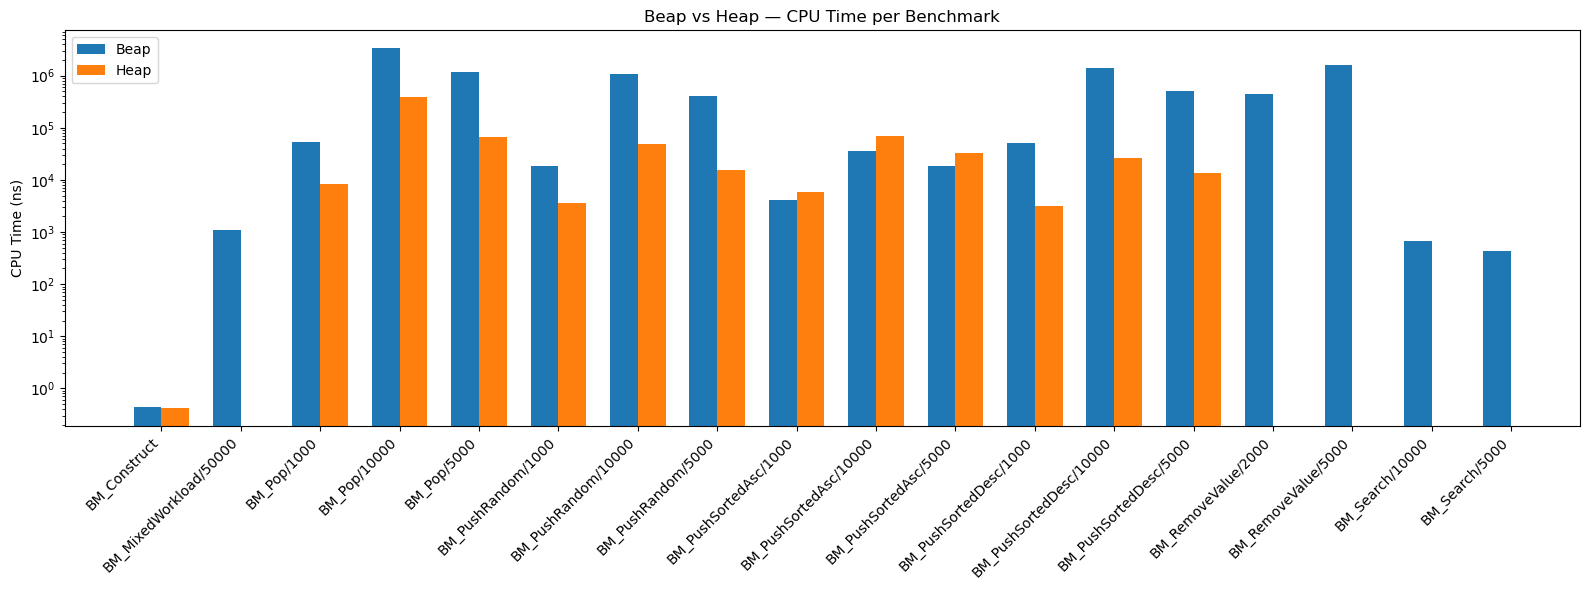

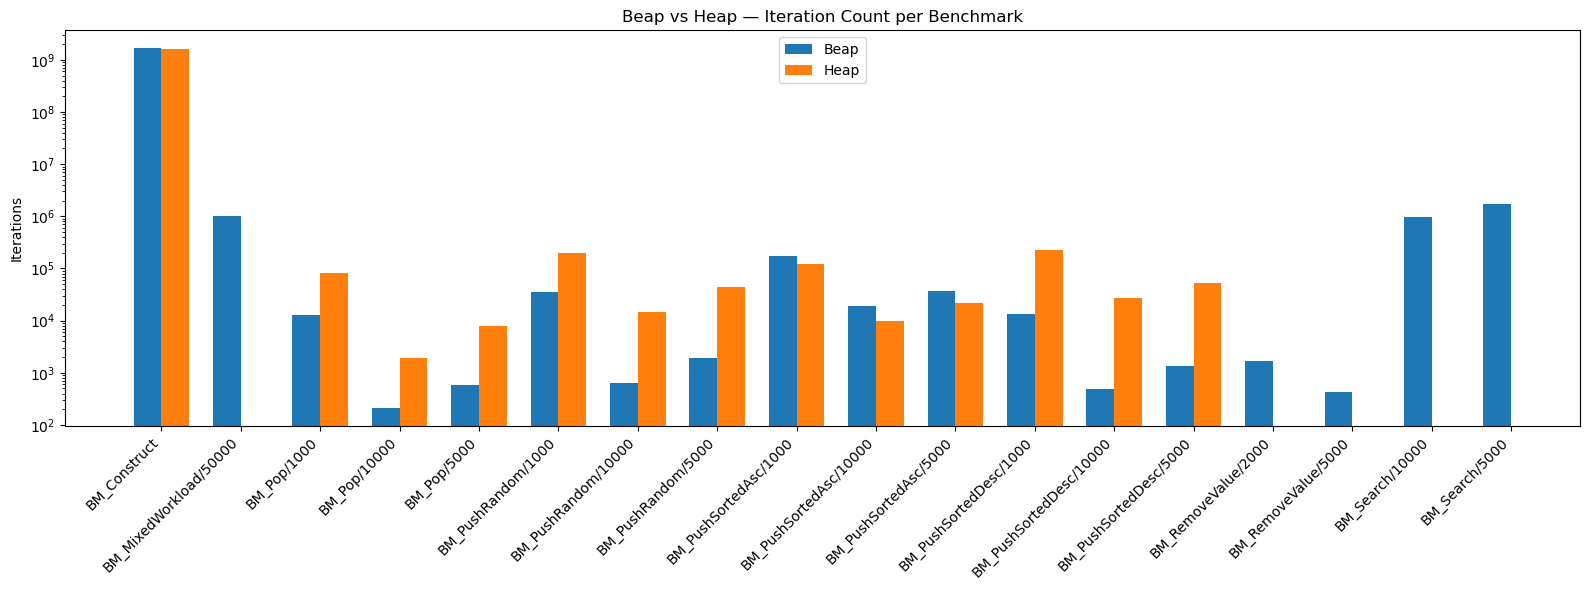

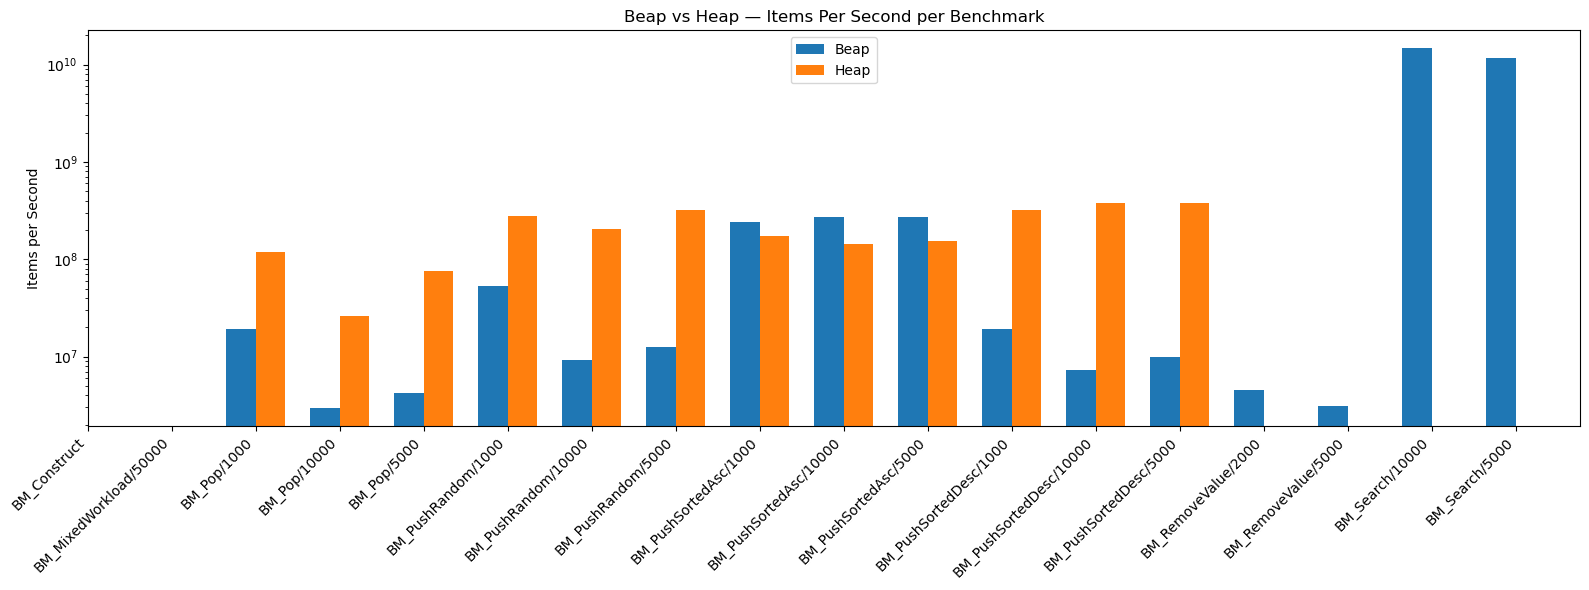

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# -------------------------------------------------------
# Load data
# -------------------------------------------------------
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")

# Set index by name for easy alignment
heap_df = heap_df.set_index("name")
beap_df = beap_df.set_index("name")

# All benchmark names (union)
all_names = beap_df.index.union(heap_df.index)

# -------------------------------------------------------
# Helper to plot a unified bar chart for ANY metric
# -------------------------------------------------------
def plot_metric(metric, ylabel, title, logscale=False):
    combined = pd.DataFrame({
        "Beap": beap_df.get(metric),
        "Heap": heap_df.get(metric)
    }, index=all_names)

    combined = combined.sort_index()

    x = np.arange(len(combined.index))
    width = 0.35

    plt.figure(figsize=(16, 6))
    plt.bar(x - width/2, combined["Beap"], width, label="Beap")
    plt.bar(x + width/2, combined["Heap"], width, label="Heap")

    plt.xticks(x, combined.index, rotation=45, ha="right")
    plt.ylabel(ylabel)
    plt.title(title)

    if logscale:
        plt.yscale("log")         # ★ log-scale here

    plt.legend()
    plt.tight_layout()
    plt.show()


# Real Time (ns)
plot_metric(
    metric="real_time",
    ylabel="Time (ns)",
    title="Beap vs Heap — Real Time per Benchmark",
    logscale=True
)

# CPU Time (ns)
plot_metric(
    metric="cpu_time",
    ylabel="CPU Time (ns)",
    title="Beap vs Heap — CPU Time per Benchmark",
    logscale=True
)

# Iterations
plot_metric(
    metric="iterations",
    ylabel="Iterations",
    title="Beap vs Heap — Iteration Count per Benchmark",
    logscale=True
)

# Items Per Second
plot_metric(
    metric="items_per_second",
    ylabel="Items per Second",
    title="Beap vs Heap — Items Per Second per Benchmark",
    logscale=True
)


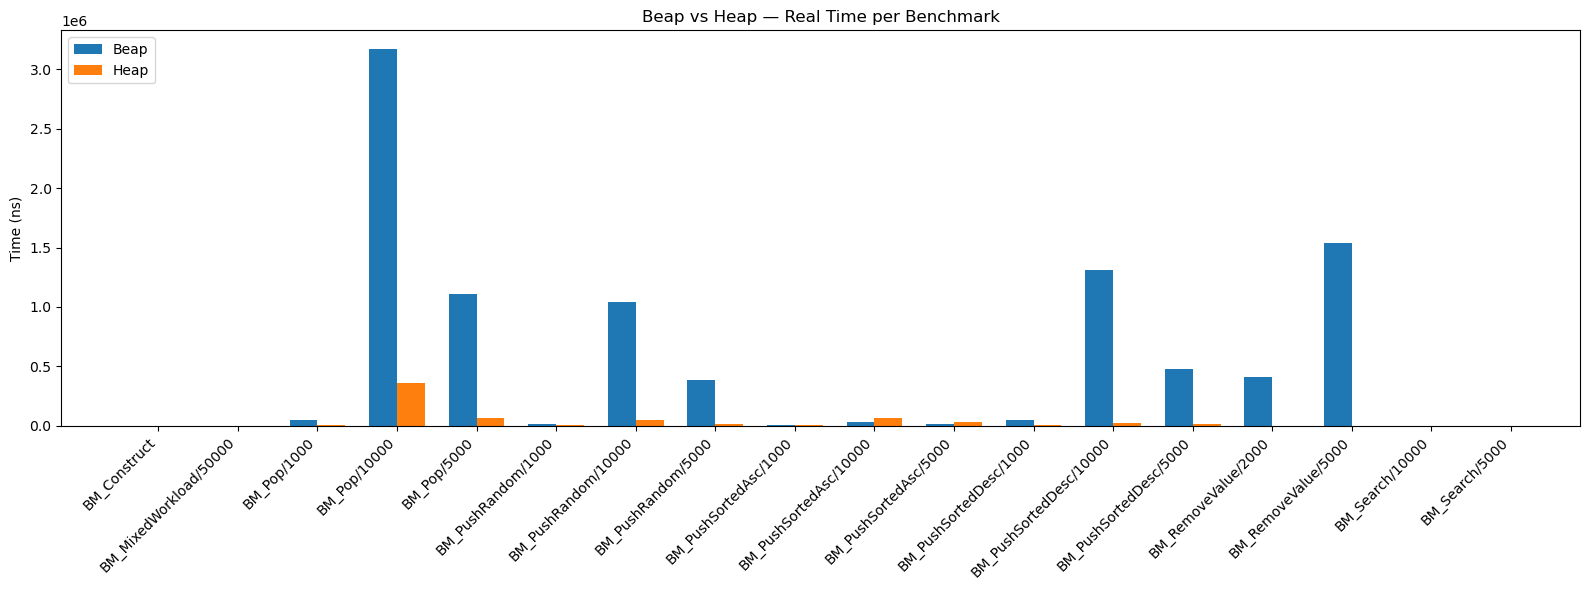

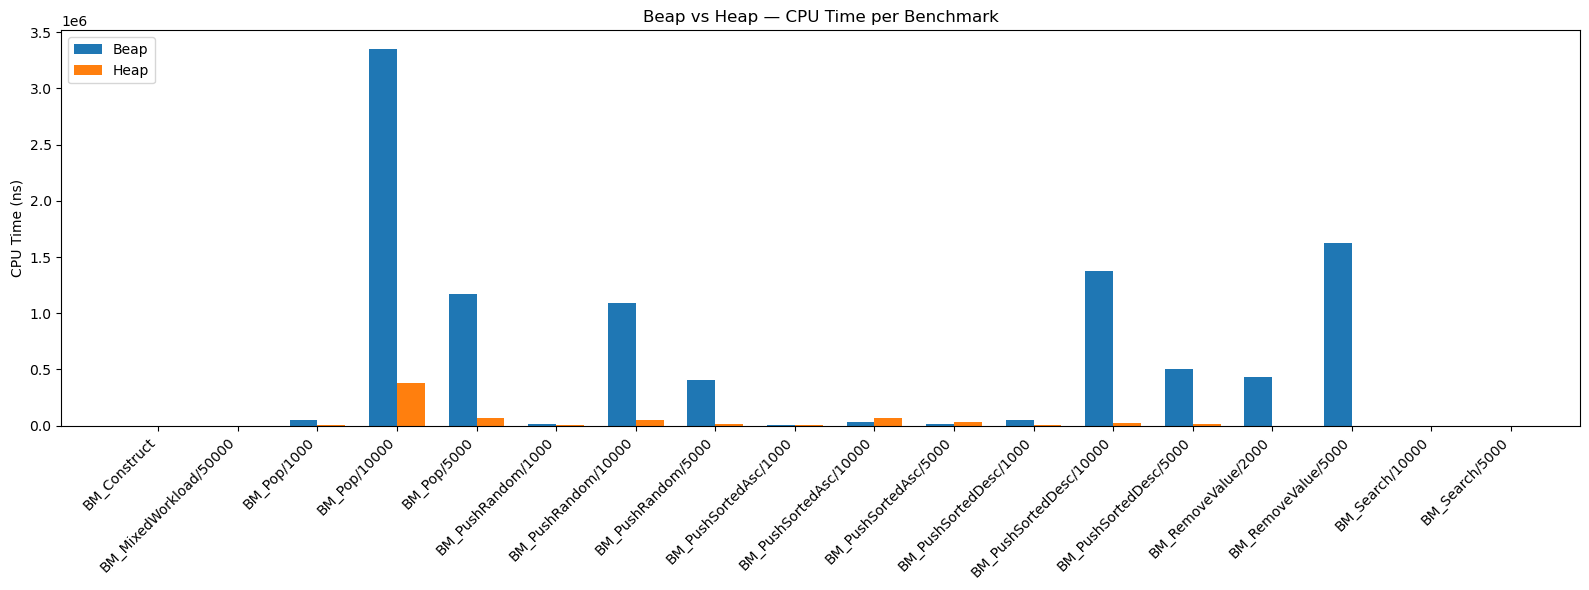

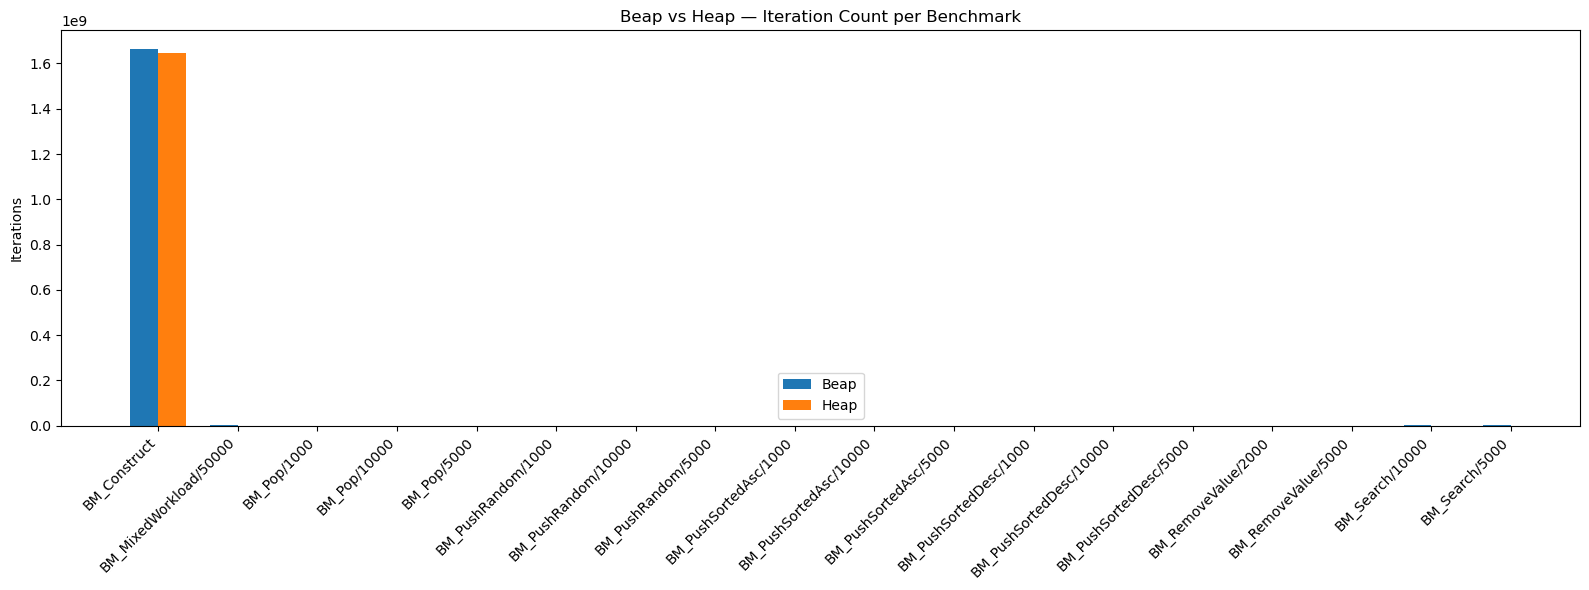

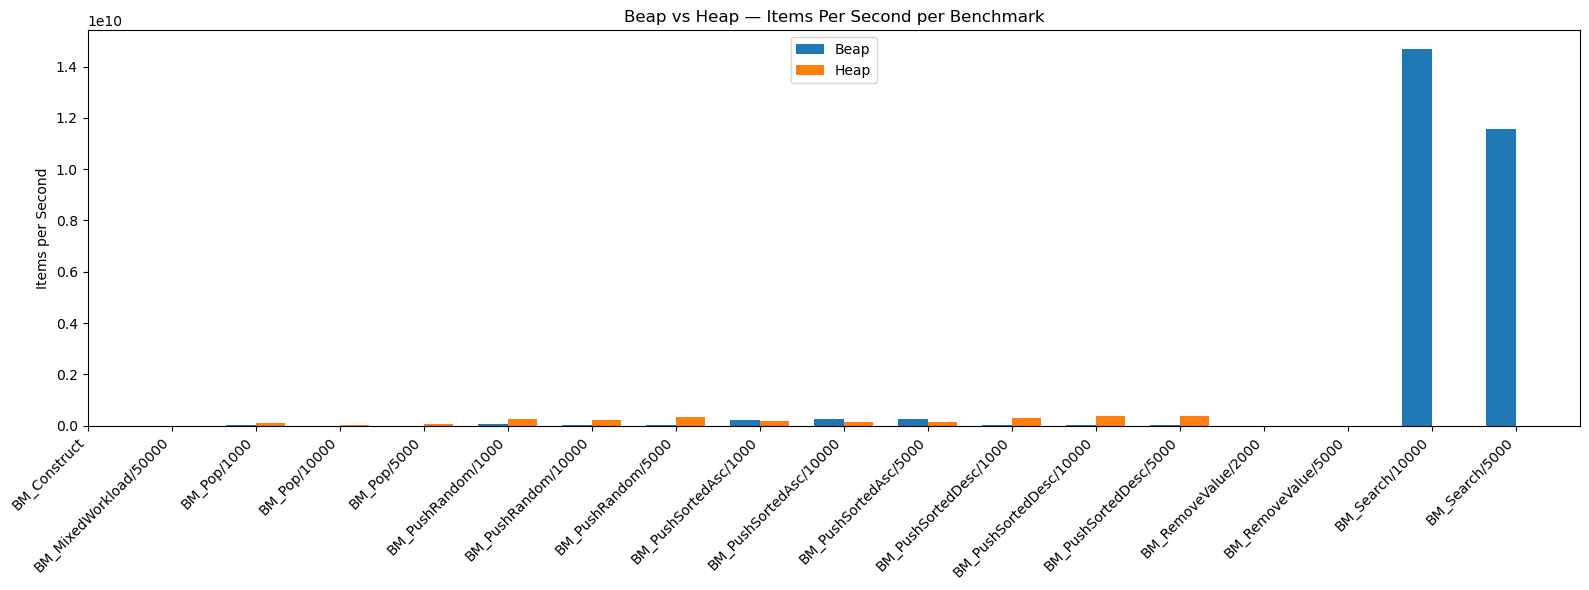

In [28]:
# Real Time (ns)
plot_metric(
    metric="real_time",
    ylabel="Time (ns)",
    title="Beap vs Heap — Real Time per Benchmark"
)

# CPU Time (ns)
plot_metric(
    metric="cpu_time",
    ylabel="CPU Time (ns)",
    title="Beap vs Heap — CPU Time per Benchmark"
)

# Iterations
plot_metric(
    metric="iterations",
    ylabel="Iterations",
    title="Beap vs Heap — Iteration Count per Benchmark"
)

# Items Per Second
plot_metric(
    metric="items_per_second",
    ylabel="Items per Second",
    title="Beap vs Heap — Items Per Second per Benchmark"
)

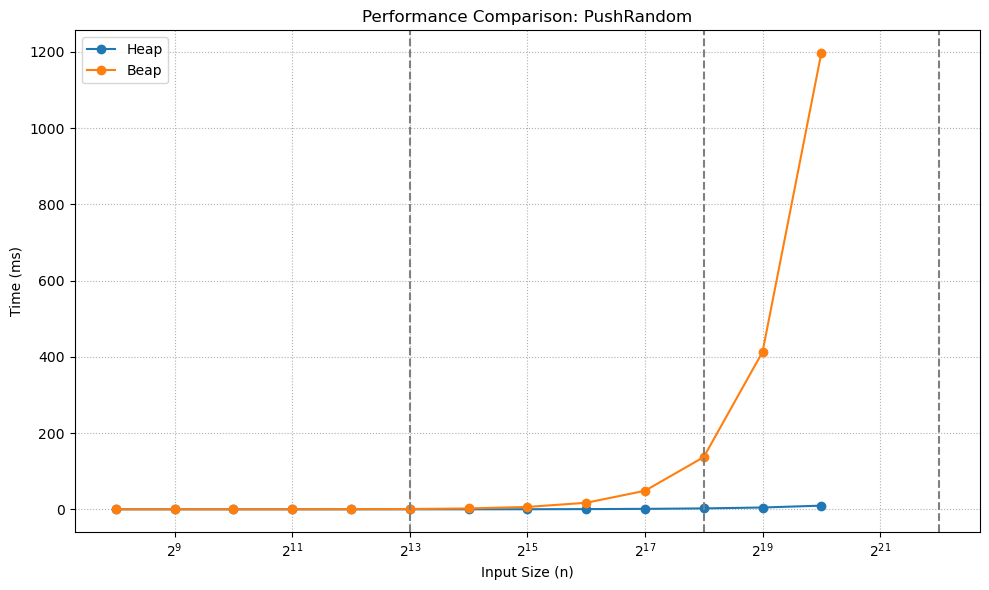

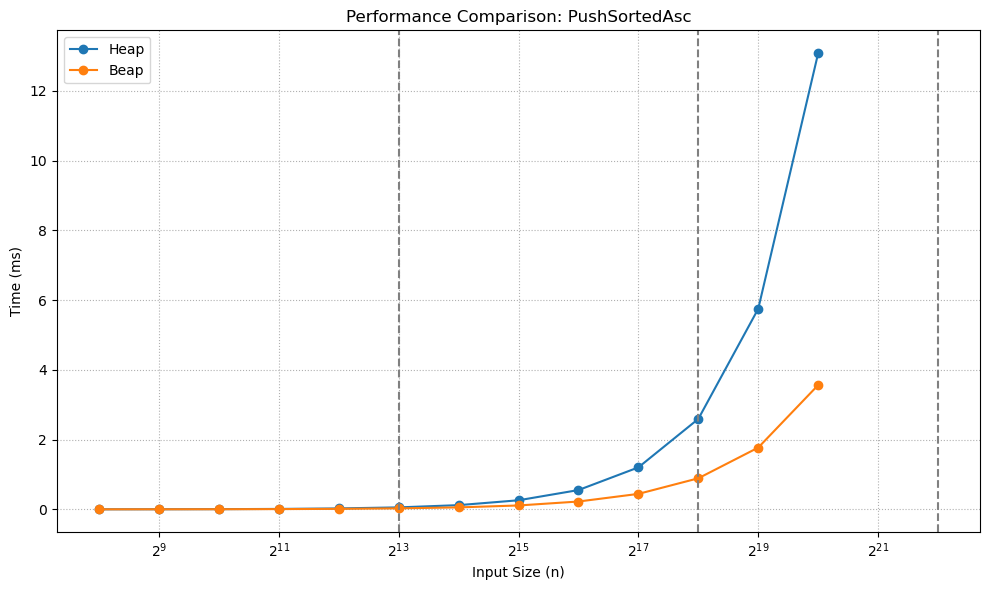

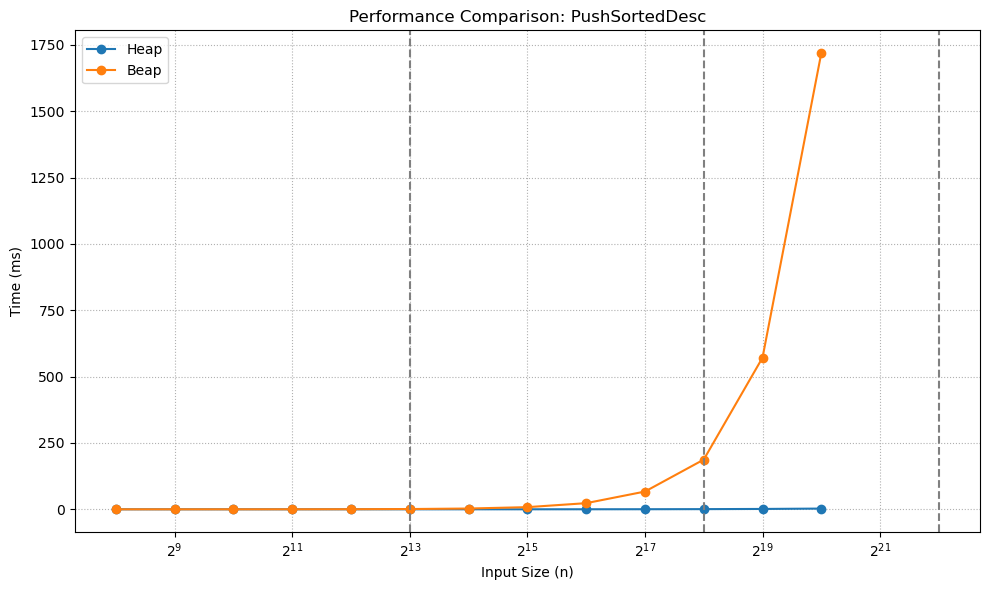

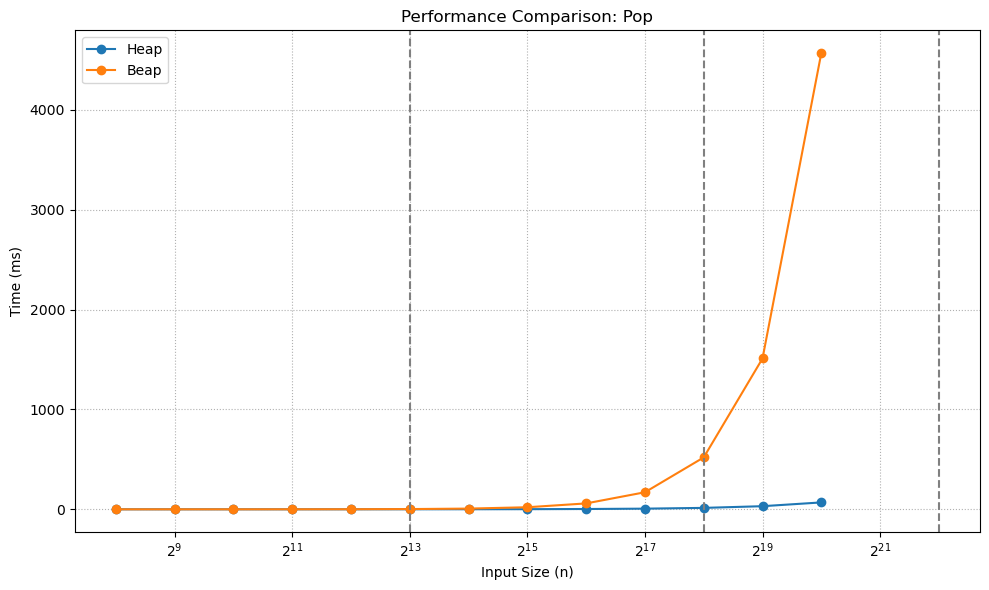

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load benchmark CSVs
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")

# Helper: extract operation and input size
def split_name(name):
    m = re.match(r"(.*)/(\d+)", name)
    if m:
        return m.group(1), int(m.group(2))
    return name, None

for df in [heap_df, beap_df]:
    df[['op', 'size']] = df['name'].apply(lambda x: pd.Series(split_name(x)))


# Filter only Push/Pop operations
ops_to_plot = [
    "BM_PushRandom",
    "BM_PushSortedAsc",
    "BM_PushSortedDesc",
    "BM_Pop"
]

for op in ops_to_plot:
    plt.figure(figsize=(10, 6))
    
    # Select operation subset
    heap_sub = heap_df[heap_df['op'] == op]
    beap_sub = beap_df[beap_df['op'] == op]
    
    # Sorting ensures correct line order
    heap_sub = heap_sub.sort_values("size")
    beap_sub = beap_sub.sort_values("size")
    
    # Convert ns to ms for readability
    heap_time = heap_sub['cpu_time'] / 1e6
    beap_time = beap_sub['cpu_time'] / 1e6
    
    # Plot both
    plt.plot(heap_sub['size'], heap_time, marker='o', label="Heap")
    plt.plot(beap_sub['size'], beap_time, marker='o', label="Beap")
    
    # Scale X-axis logarithmically (important!)
    plt.xscale('log', base=2)
    
    # Labels & Formatting
    plt.xlabel("Input Size (n)")
    plt.ylabel("Time (ms)")
    plt.title(f"Performance Comparison: {op.replace('BM_', '')}")
    plt.legend()
    
    # Cache boundary markers (optional)
    plt.axvline(8192, color='gray', linestyle='--', label="L1 Boundary" if op == ops_to_plot[0] else "")
    plt.axvline(262144, color='gray', linestyle='--', label="L2 Boundary" if op == ops_to_plot[0] else "")
    plt.axvline(4194304, color='gray', linestyle='--', label="L3 Boundary" if op == ops_to_plot[0] else "")
    
    plt.grid(True, which="both", ls=":")
    plt.tight_layout()
    plt.show()


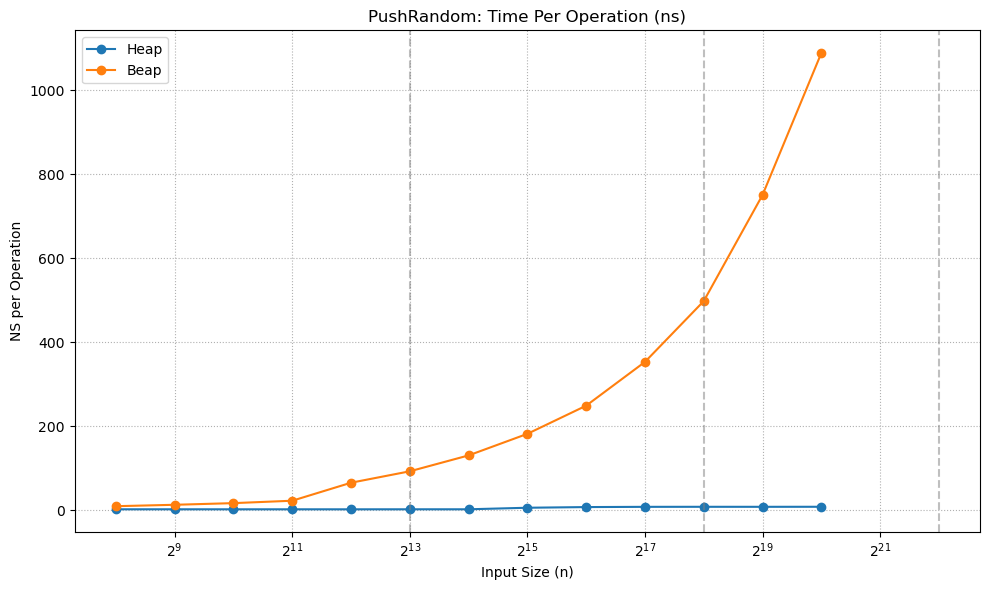

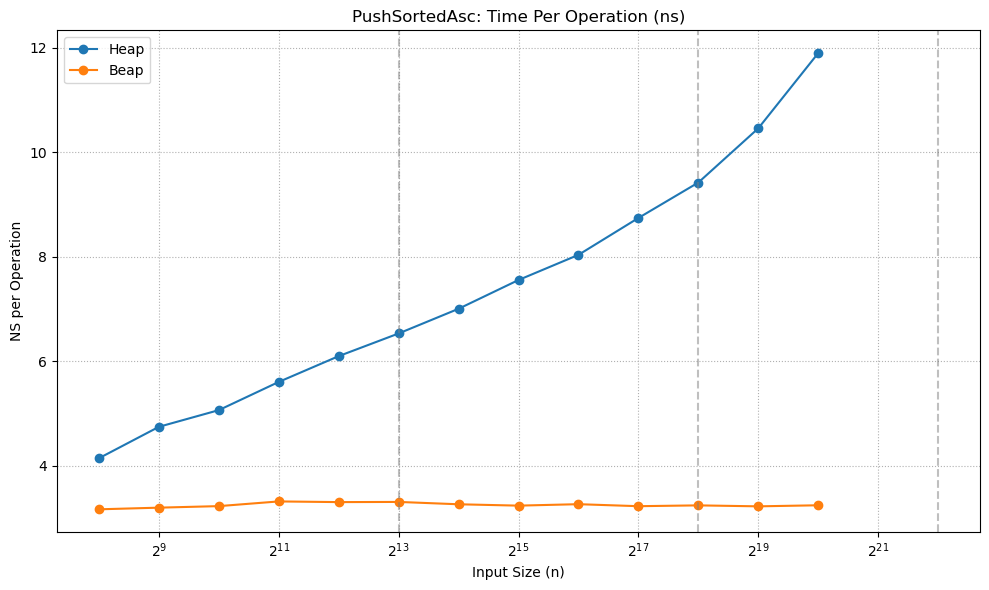

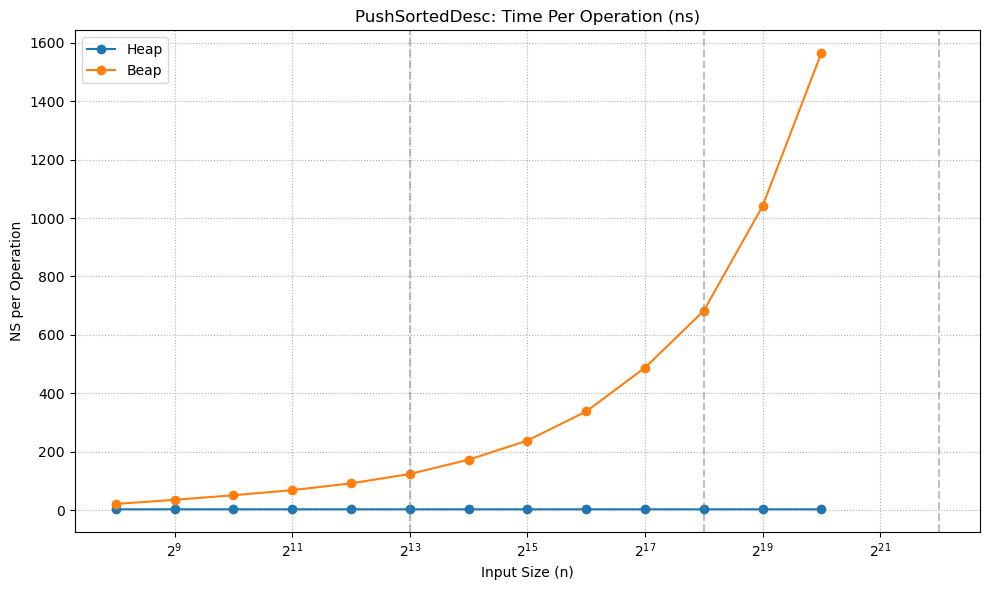

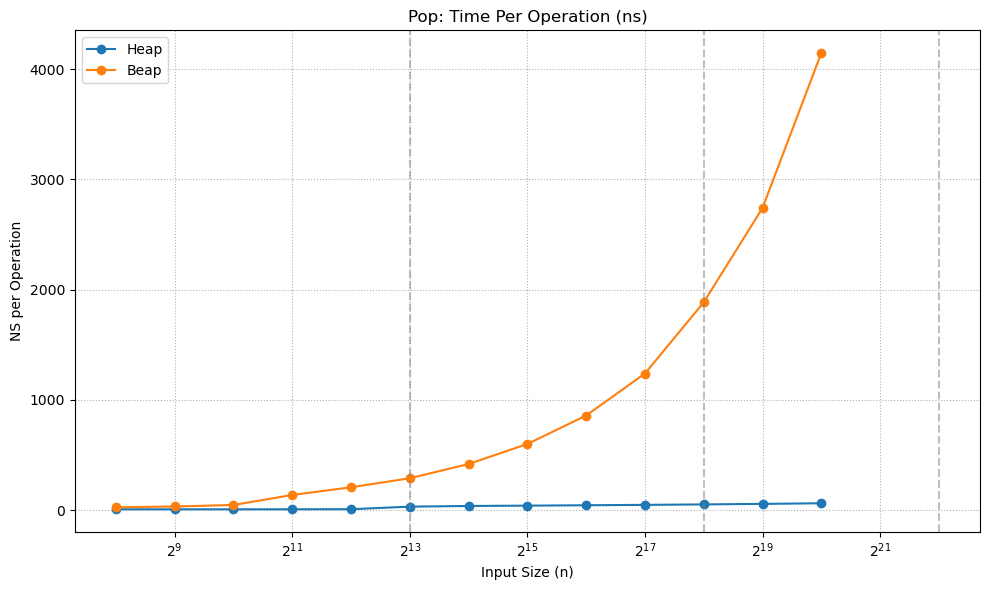

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load benchmark CSVs
heap_df = pd.read_csv("bench_heap.csv")
beap_df = pd.read_csv("bench_beap.csv")

# Helper: extract operation name and size
def split_name(name):
    m = re.match(r"(.*)/(\d+)", name)
    if m:
        return m.group(1), int(m.group(2))
    return name, None

for df in [heap_df, beap_df]:
    df[['op', 'size']] = df['name'].apply(lambda x: pd.Series(split_name(x)))


# Focus operations
ops_to_plot = [
    "BM_PushRandom",
    "BM_PushSortedAsc",
    "BM_PushSortedDesc",
    "BM_Pop"
]

for op in ops_to_plot:
    plt.figure(figsize=(10, 6))
    
    heap_sub = heap_df[heap_df['op'] == op].sort_values("size")
    beap_sub = beap_df[beap_df['op'] == op].sort_values("size")
    
    # Calculate NS per operation
    heap_cost = heap_sub['real_time'] / heap_sub['size']
    beap_cost = beap_sub['real_time'] / beap_sub['size']
    
    # Plot
    plt.plot(heap_sub['size'], heap_cost, marker='o', label="Heap")
    plt.plot(beap_sub['size'], beap_cost, marker='o', label="Beap")
    
    plt.xscale('log', base=2)
    
    plt.xlabel("Input Size (n)")
    plt.ylabel("NS per Operation")
    plt.title(f"{op.replace('BM_', '')}: Time Per Operation (ns)")
    plt.legend()
    
    # Optional: Cache boundary indicators
    plt.axvline(8192, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(262144, color='gray', linestyle='--', alpha=0.5)
    plt.axvline(4194304, color='gray', linestyle='--', alpha=0.5)
    
    plt.grid(True, which="both", ls=":")
    plt.tight_layout()
    plt.show()
